In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [5]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [10]:
corpus =[]
stop_words = set(stopwords.words('english'))
for i in range(0,1000):
    review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])
    review = review.lower()
    
    review_words = review.split()
    exclude_words = {'not', 'didnot', 'doesnot', 'nothing', 'none', 'donnot', 'cannot', 'havent'}
    review_words = [word for word in review_words if word not in stop_words or word in exclude_words]
    ps= PorterStemmer()
    review =[ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [12]:
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)

In [15]:
X_train.shape , X_test.shape

((800, 1500), (200, 1500))

In [16]:
y_train.shape , y_test.shape

((800,), (200,))

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred=classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [21]:
score1 =accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

In [22]:
print("accuracy score is {}%".format(round(score1*100,3)))
print("precision score is {}%".format(round(score2*100,3)))
print("recall score is {}% ".format(round(score1*100,3)))

accuracy score is 77.5%
precision score is 77.885%
recall score is 77.5% 


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[74, 23],
       [22, 81]], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

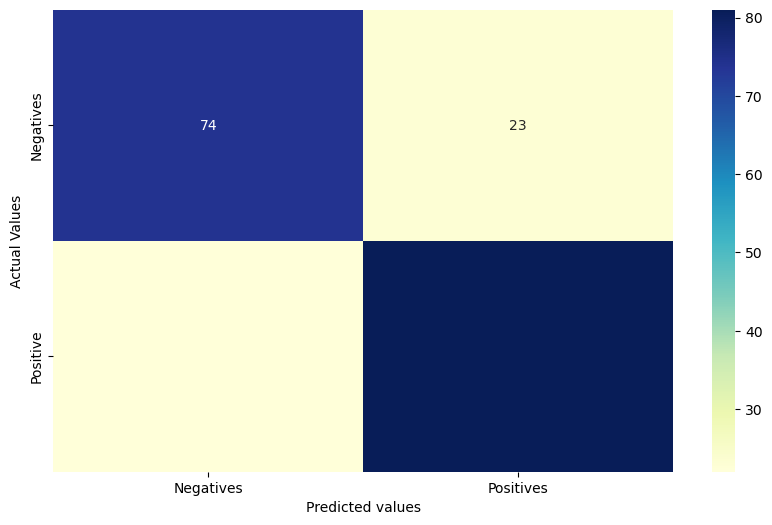

In [26]:
plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negatives','Positives'],yticklabels=['Negatives','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [27]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 78.5%
Accuracy Score for alpha=0.2 is 79.0%
Accuracy Score for alpha=0.3 is 78.5%
Accuracy Score for alpha=0.4 is 78.5%
Accuracy Score for alpha=0.5 is 78.0%
Accuracy Score for alpha=0.6 is 78.0%
Accuracy Score for alpha=0.7 is 78.5%
Accuracy Score for alpha=0.8 is 78.0%
Accuracy Score for alpha=0.9 is 78.0%
Accuracy Score for alpha=1.0 is 77.5%
----------------------------------------------------
The Best Accuracy Score is 79.0% with alpha value as 0.2


In [28]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [39]:
#unseen data
sample_review='nice place'
if(predict_sentiment(sample_review)):
    print('Positive review')
else:
    print('Negative review')

Positive review


In [40]:
sample_review='poor quality'
if(predict_sentiment(sample_review)):
    print('Positive review')
else:
    print('Negative review')

Negative review


In [41]:
print(len(corpus))

4


In [42]:
!pip install transformers

In [43]:
!pip install scipy


In [44]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax

In [45]:
roberta="cardiffnlp/twitter-roberta-base-sentiment"
model=AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer=AutoTokenizer.from_pretrained(roberta)

C:\Users\Hp\anaconda3\anaconda\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [47]:
corpus=['wow love place', 'crust not good', 'poor quality', 'recommended love ']
for review in corpus:
   labels=['Negative','neutral' ,'positive']
   encoded=tokenizer(review,return_tensors='pt')
   output=model(encoded['input_ids'],encoded['attention_mask'])
   scores=output[0][0].detach().numpy()
   scores=softmax(scores)
   print(review,'is') 
   for i in range(len(scores)):
     l=labels[i]
     s=scores[i]
     print(l,s)
   print('\n')    

wow love place is
Negative 0.004607455
neutral 0.045384813
positive 0.95000774


crust not good is
Negative 0.9138881
neutral 0.07672643
positive 0.0093854945


poor quality is
Negative 0.7470451
neutral 0.22542486
positive 0.027530063


recommended love  is
Negative 0.025502551
neutral 0.38958886
positive 0.5849086


